In [1]:
import numpy as np

from Tools.sample import *
from Tools.visualization import *
from Tools.text_processing import *
from Models.NaiveBayesianClassifier import *

### Bernoulli Naive Bayes

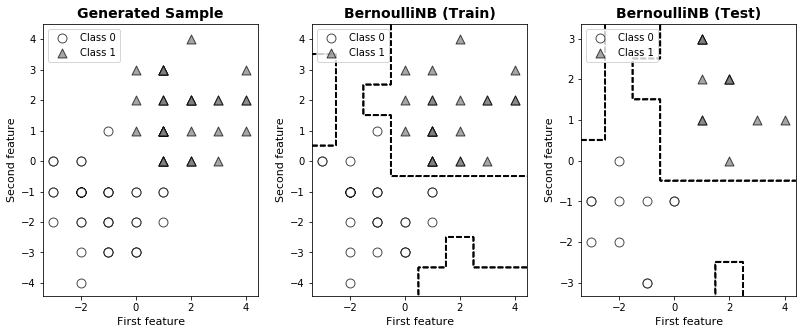

In [8]:
X, y = gen_class(n=40, interval=1.5, label_type=1, random_seed=4)
X = X.round(0)
X_train, X_test, y_train, y_test = split_train_test(X, y, 0.3)
bnb = Bernoulli()
bnb.fit(X_train, y_train)
fig = plt.figure(figsize=(13.5,5))
fig.subplots_adjust(wspace=0.25)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
LinearClassifierPlot(ax=ax1, title='Generated Sample').scatter_plot(X, y)
bnb_tr = LinearClassifierPlot(ax=ax2, title='BernoulliNB (Train)')
bnb_tr.scatter_plot(X_train, y_train)
bnb_tr.hyperplane_plot_BNB(bnb)
bnb_te = LinearClassifierPlot(ax=ax3, title='BernoulliNB (Test)')
bnb_te.scatter_plot(X_test, y_test)
bnb_te.hyperplane_plot_BNB(bnb)

In [21]:
print('Training score: %s\nTesting score: %s' % (gnb.score(X_train, y_train), 
                                                 gnb.score(X_test, y_test)))

Training score: 0.8928571428571429
Testing score: 1.0


### Gaussian Naive Bayes

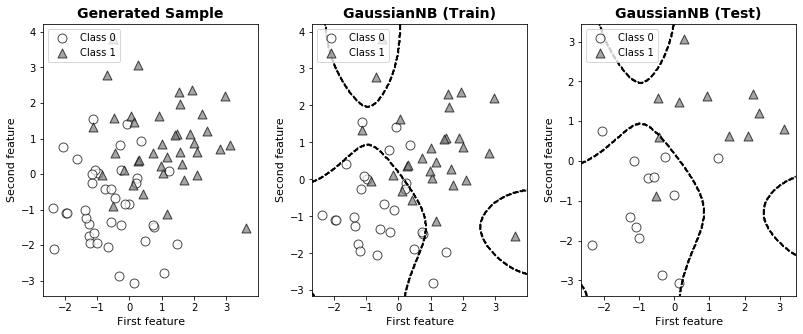

In [7]:
X, y = gen_class(n=40, interval=0.8, label_type=1, random_seed=1)
X_train, X_test, y_train, y_test = split_train_test(X, y, 0.3)
gnb = Gaussian()
gnb.fit(X_train, y_train)
fig = plt.figure(figsize=(13.5,5))
fig.subplots_adjust(wspace=0.25)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
LinearClassifierPlot(ax=ax1, title='Generated Sample').scatter_plot(X, y)
gnb_tr = LinearClassifierPlot(ax=ax2, title='GaussianNB (Train)')
gnb_tr.scatter_plot(X_train, y_train)
gnb_tr.hyperplane_plot(gnb)
gnb_te = LinearClassifierPlot(ax=ax3, title='GaussianNB (Test)')
gnb_te.scatter_plot(X_test, y_test)
gnb_te.hyperplane_plot(gnb)

In [20]:
print('Training score: %s\nTesting score: %s' % (gnb.score(X_train, y_train), 
                                                 gnb.score(X_test, y_test)))

Training score: 0.7678571428571429
Testing score: 0.8333333333333334


### Multinomial Naive Bayes

In [2]:
df = pd.read_csv('Dataset\\imdb_dataset.csv', error_bad_lines=False, engine='python')
# dataset from 
# import a prepared a dictionary
word_list_ext = pd.read_csv('Dataset\\word_dict.csv')['word'].values
word_dict_ext = dict(zip(set(word_list_ext), range(len(set(word_list_ext)))))
word_index = word_dict(df.review, len(word_dict_ext))

X, y = text2array(df.review, word_dict_ext), (df.sentiment.values=='positive')*1.0
X_train, X_test, y_train, y_test = split_train_test(X, y, 0.2)

In [4]:
mnb = Multinomial()
mnb.fit(X_train, y_train)
print('Training score: %s\nTesting score: %s' % (mnb.score(X_train, y_train), 
                                                 mnb.score(X_test, y_test)))


Training score: 0.8346
Testing score: 0.8022


print(df.review.values\[1\])
>A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.

print(df.sentiment.values\[1\])
>positive

print(mnb.predict(X\[1\]))
>\[1.\]